# Solar Irradiance EDA

## Data Merging and Preprocessing

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Directory containing folders with zip code names
base_dir = r'D:\Veena\SJSU-Classes\Sem2\DATA-245 Sec 21 - Machine Learning\Project\Data\Sanjose Data'

In [ ]:
# Initializing an empty list to store dataframes
dfs = []

# Iterating over each folder in the base directory
for folder_name in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder_name)

    # Checking if the path is a directory
    if os.path.isdir(folder_path):
        # Extract zip code from folder name
        zipcode = folder_name

        # Getting a list of CSV files in the current folder
        csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

        # Iterating over each CSV file
        for file in csv_files:
            # Reading CSV file into a dataframe skipping first 2 rows
            df = pd.read_csv(file, skiprows=2)

            # Adding a column to capture the zipcode
            df['zipcode'] = zipcode

            # Appending the dataframe to the list
            dfs.append(df)

# Concatenating all dataframes into a single dataframe
final_df = pd.concat(dfs, ignore_index=True)

In [ ]:
# Printing the final dataframe
print(final_df)

In [ ]:
# Checking to see if it has worked as expected
final_df.tail

In [ ]:
# Creating hour_decimal variable in decimal format for ease of day part caculation
final_df['hour_decimal'] = final_df['Hour'] + final_df['Minute'] / 60

In [ ]:
print(final_df.head())

In [ ]:
# Defining function to map hour values to day parts
def map_hour_to_day_part(hour_decimal):
    if hour_decimal >= 0 and hour_decimal < 5:
        return 'late_night_start_of_day'
    elif hour_decimal >= 5 and hour_decimal < 8:
        return 'early_morning'
    elif hour_decimal >= 8 and hour_decimal < 12:
        return 'morning'
    elif hour_decimal >= 12 and hour_decimal < 16:
        return 'afternoon'
    elif hour_decimal >= 16 and hour_decimal < 18:
        return 'evening'
    elif hour_decimal >= 18 and hour_decimal < 20:
        return 'late_evening'
    elif hour_decimal >= 20 and hour_decimal < 22:
        return 'early_night'
    else:
        return 'late_night'

In [ ]:
# Applying the function to map hour to day part and create hour_day_part column
final_df['hour_day_part'] = final_df['hour_decimal'].apply(map_hour_to_day_part)

In [ ]:
# Dropping the intermediate 'hour_decimal' column since it's not required
final_df.drop(columns=['hour_decimal'], inplace=True)

# Checking the new column
print(final_df)

In [ ]:
final_df_csv = pd.DataFrame(final_df)

# Save DataFrame to a CSV file
final_df_csv.to_csv('SolarIrradiance.csv', index=False)  # Set index=False to exclude index column in the CSV file

print("DataFrame converted to CSV successfully.")

In [ ]:
final_df['zipcode'].unique()

In [ ]:
zipcode_counts = final_df.groupby('zipcode').size()
zipcode_counts

In [ ]:
# Creating a working copy for reference
working_ir_df = final_df.copy()

In [ ]:
# Defining columns to be dropped
columns_to_drop = ['Fill Flag', 'Surface Albedo', 'Wind Direction', 'Global Horizontal UV Irradiance (280-400nm)',
                  'Global Horizontal UV Irradiance (295-385nm)']

# Dropping multiple unnecessary columns
working_ir_df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
working_ir_df.describe()

In [ ]:
# Save DataFrame to a CSV file
working_ir_df.to_csv('SolarIrradiance - processed.csv', index=False)

print("DataFrame converted to CSV successfully.")

Data Source, how did we extract and merge

In [ ]:
from google.colab import drive

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# File path to the Solar Irradiance processed data stored in Google Drive
file_path = '/content/drive/Shareddrives/DATA245_Project/SolarIrradiance_processed.csv'

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading the Solar Irradiance processed data from the specified file path into a pandas DataFrame
solar_ir_df = pd.read_csv(file_path)

In [ ]:
#checking data - Top 2 row
solar_ir_df.head(2)

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,...,DHI,DNI,GHI,Relative Humidity,Solar Zenith Angle,Pressure,Precipitable Water,Wind Speed,zipcode,hour_day_part
0,2018,1,1,0,30,10.4,0,0,0,4,...,0,0,0,96.33,165.11,1024,1.7,0.7,95110,late_night_start_of_day
1,2018,1,1,1,30,10.2,0,0,0,0,...,0,0,0,96.98,157.82,1024,1.8,0.7,95110,late_night_start_of_day


Summary statistics (describe, shape, missing values null values etc)

In [ ]:
# Displaying the rows and columns of the data
solar_ir_df.shape

(1314720, 21)

In [ ]:
#checking all the features or columns of the data
solar_ir_df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Temperature', 'Clearsky DHI',
       'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point', 'DHI', 'DNI',
       'GHI', 'Relative Humidity', 'Solar Zenith Angle', 'Pressure',
       'Precipitable Water', 'Wind Speed', 'zipcode', 'hour_day_part'],
      dtype='object')

According to the given data, it appears to include a number of weather-related parameters, including temperature, cloud type, actual measured DHI, DNI, and GHI, relative humidity, solar zenith angle, pressure, precipitable water, wind speed, and a few other parameters.

In [ ]:
# Summary statistics of the data
solar_ir_df.describe()

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,DHI,DNI,GHI,Relative Humidity,Solar Zenith Angle,Pressure,Precipitable Water,Wind Speed,zipcode
count,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1314720.0,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06
mean,2.020000e+03,6.523549e+00,1.572782e+01,1.150000e+01,30.0,1.569358e+01,4.366212e+01,3.581658e+02,2.483008e+02,1.533958e+00,8.382243e+00,5.261429e+01,2.918992e+02,2.241401e+02,6.802095e+01,8.968456e+01,1.014349e+03,1.553625e+00,1.924700e+00,9.512833e+04
std,1.413827e+00,3.448534e+00,8.799328e+00,6.922189e+00,0.0,6.715500e+00,5.266085e+01,3.912259e+02,3.228307e+02,2.725400e+00,3.899133e+00,7.183775e+01,3.681441e+02,3.088930e+02,2.424006e+01,3.748750e+01,1.045495e+01,6.718073e-01,1.015036e+00,1.508937e+01
min,2.018000e+03,1.000000e+00,1.000000e+00,0.000000e+00,30.0,-2.800000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.820000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.770000e+00,1.444000e+01,9.590000e+02,2.000000e-01,1.000000e-01,9.511000e+04
25%,2.019000e+03,4.000000e+00,8.000000e+00,5.750000e+00,30.0,1.090000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.916000e+01,6.008000e+01,1.012000e+03,1.100000e+00,1.100000e+00,9.511900e+04
50%,2.020000e+03,7.000000e+00,1.600000e+01,1.150000e+01,30.0,1.440000e+01,1.000000e+01,6.100000e+01,1.100000e+01,0.000000e+00,9.000000e+00,7.000000e+00,0.000000e+00,8.000000e+00,7.340000e+01,8.909000e+01,1.017000e+03,1.400000e+00,1.600000e+00,9.512650e+04
75%,2.021000e+03,1.000000e+01,2.300000e+01,1.725000e+01,30.0,1.930000e+01,8.400000e+01,8.010000e+02,4.960000e+02,3.000000e+00,1.110000e+01,9.100000e+01,6.880000e+02,4.310000e+02,8.885000e+01,1.197800e+02,1.020000e+03,1.900000e+00,2.600000e+00,9.513400e+04
max,2.022000e+03,1.200000e+01,3.100000e+01,2.300000e+01,30.0,4.620000e+01,4.380000e+02,1.023000e+03,1.053000e+03,9.000000e+00,2.040000e+01,5.130000e+02,1.023000e+03,1.053000e+03,1.000000e+02,1.653700e+02,1.040000e+03,5.000000e+00,8.800000e+00,9.519200e+04


1. Temporal Distribution:
   - The data spans from the year 2018 to 2022, covering multiple years.
   - Most of the data falls within the months of April to October, with fewer entries for the other months.

2. Temperature:
   - The temperature ranges from approximately -2.8°C to 46.2°C.
   - The average temperature is around 15.7°C, with a standard deviation of approximately 6.7°C.

3. Solar Irradiance:
   - The columns related to solar irradiance (Clearsky DHI, Clearsky DNI, Clearsky GHI, DHI, DNI, GHI) have a wide range of values.

4. Relative Humidity:
   - Relative humidity ranges from 4.77% to 100%, with an average of approximately 68.0% and a standard deviation of about 24.2%.

5. Pressure and Wind Speed:
   - Pressure ranges from 959.0 to 1040.0 millibars, with an average of approximately 1014.3 millibars.
   - Wind speed varies from 0.2 to 8.8 meters per second, with an average of around 1.9 meters per second.

6. Cloud Type and Precipitable Water:
   - The 'Cloud Type' column seems to be represented numerically, with a mean value of approximately 1.53.
   - Precipitable water ranges from 0.1 to 5.0 millimeters, with an average of about 1.9 millimeters.

These insights provide a comprehensive understanding of the numerical features in the dataset, enabling further analysis and modeling to predict solar irradiance and support the implementation of solar-powered streetlights.

In [ ]:
# Displaying information about the dataset, including column names, data types, and non-null counts
solar_ir_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314720 entries, 0 to 1314719
Data columns (total 21 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Year                1314720 non-null  int64  
 1   Month               1314720 non-null  int64  
 2   Day                 1314720 non-null  int64  
 3   Hour                1314720 non-null  int64  
 4   Minute              1314720 non-null  int64  
 5   Temperature         1314720 non-null  float64
 6   Clearsky DHI        1314720 non-null  int64  
 7   Clearsky DNI        1314720 non-null  int64  
 8   Clearsky GHI        1314720 non-null  int64  
 9   Cloud Type          1314720 non-null  int64  
 10  Dew Point           1314720 non-null  float64
 11  DHI                 1314720 non-null  int64  
 12  DNI                 1314720 non-null  int64  
 13  GHI                 1314720 non-null  int64  
 14  Relative Humidity   1314720 non-null  float64
 15  Solar Zenith An

1. Dataframe Overview:
   - The dataset contains 1,314,720 entries (rows) and 21 columns.

2. Column Information:
   - The columns represent various parameters related to weather, time, and solar irradiance measurements.
   - Most columns have non-null counts equal to the total number of entries, indicating that there are no missing values in the dataset.

3. Data Types:
   - The data types of the columns include integers (`int64`), floats (`float64`), and one object type (`object`).
   - Integer and float data types are prevalent for numerical data, while the object data type is observed for the 'hour_day_part' column, which likely contains categorical information.

4. Numerical Features:
   - Numerical features such as 'Temperature', 'Dew Point', 'Relative Humidity', 'Solar Zenith Angle', 'Pressure', 'Precipitable Water', and 'Wind Speed' are represented as float or integer data types.
   - These features provide information about environmental conditions that can influence solar irradiance.

5. Categorical Feature:
   - The 'hour_day_part' column is identified as an object data type, indicating it likely contains categorical values representing different parts of the day.
   - This column may be useful for analyzing diurnal variations in solar irradiance and environmental factors.

6. Memory Usage:
   - The memory usage of the dataframe is approximately 210.6 MB, which provides an estimate of the amount of memory required to store the dataset in memory.

All things considered, the dataframe seems to be well-organized and includes all the important details required for assessing and forecasting solar irradiation. The dataset is reliable for additional analysis and modelling activities as there are no missing values.

Filtering - only top 10 zip code

In [ ]:
# Counting the number of rows by zipcode
zipcode_counts = solar_ir_df.groupby('zipcode').size()

# Print the counts
zipcode_counts

zipcode
95110    43824
95111    43824
95112    43824
95113    43824
95116    43824
95117    43824
95118    43824
95119    43824
95120    43824
95121    43824
95122    43824
95123    43824
95124    43824
95125    43824
95126    43824
95127    43824
95128    43824
95129    43824
95130    43824
95131    43824
95132    43824
95133    43824
95134    43824
95135    43824
95136    43824
95138    43824
95139    43824
95141    43824
95148    43824
95192    43824
dtype: int64

The key insights from this output is that:

1. There is data for multiple zipcodes, ranging from 95110 to 95192.
2. The count of rows/observations is the same for all zipcodes, which is 43824.

In [ ]:
# The specified zip codes account for >50% of San Jose population
san_jose_zipcodes_filter = [95123,95127,95111,95122,95125,95116,95112,95124,95148,95136]

# Filtering the data for the top 10 zipcodes
solar_ir_df_zip_filter = solar_ir_df[solar_ir_df['zipcode'].isin(san_jose_zipcodes_filter)]

# Filtering data for 2020-2022
solar_ir_df_zip_filter_year = solar_ir_df_zip_filter[solar_ir_df_zip_filter['Year'] >= 2020]

Here we are preparing a subset of the original dataset, focusing on the most populous zipcodes in San Jose and the most recent years (2020-2022), for further analysis or processing.

In [ ]:
solar_ir_df_zip_filter_year.shape

(263040, 21)

In [ ]:
solar_ir_df_zip_filter_year.head(1)

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,...,DHI,DNI,GHI,Relative Humidity,Solar Zenith Angle,Pressure,Precipitable Water,Wind Speed,zipcode,hour_day_part
61344,2020,1,1,0,30,8.3,0,0,0,7,...,0,0,0,98.19,165.13,1020,1.1,1.1,95111,late_night_start_of_day


1. The filtered dataset contains 263,040 rows or observations.
2. Filtering was done to include data from the top 10 San Jose zipcodes for the years 2020-2022.

In [ ]:
# Function to count missing values (including NA, NaNs, and 0)
def count_missing(df):
    missing_counts = df.isna().sum()  # Count missing values (NaN)
    missing_counts = missing_counts.add(df.eq(0).sum(), axis=0)  # Count zeros
    return missing_counts

# Printing the counts of missing values
missing_value_counts = count_missing(solar_ir_df_zip_filter_year.copy())
print(missing_value_counts)

Year                       0
Month                      0
Day                        0
Hour                   10960
Minute                     0
Temperature                1
Clearsky DHI          126963
Clearsky DNI          126938
Clearsky GHI          126963
Cloud Type            202336
Dew Point                306
DHI                   126999
DNI                   130777
GHI                   126999
Relative Humidity          0
Solar Zenith Angle         0
Pressure                   0
Precipitable Water         0
Wind Speed                 0
zipcode                    0
hour_day_part              0
dtype: int64


1. **Missing Values**:
   - The Dataset contains missing values in multiple columns, as indicated by the non-zero counts.
   - Columns such as 'Day', 'Year', 'Month', 'Minute', 'Relative Humidity', 'Solar Zenith Angle', 'Pressure', 'Precipitable Water', 'Wind Speed', 'zipcode', and 'hour_day_part' have no missing values.
   - However, several other columns have varying numbers of missing values.

2. **Columns with Missing Values**:
   - Columns 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'DHI', 'DNI', and 'GHI' have a considerable number of missing values.
   - These columns are related to solar irradiance measurements and cloud type, which are crucial for analyzing solar energy potential.

3. **Impact on Analysis**:
   - The presence of missing values, particularly in columns related to solar irradiance, can affect the accuracy and reliability of analysis and modeling tasks.
   - Strategies for handling missing values, such as imputation or removal of affected rows/columns, may be necessary to ensure the integrity of the analysis results.

There are a lot of zeros in DHI, DNI, GHI, clearsky DHI, Clearsky DNI and clearsky GHI columns because there is no irradiance during the night time.
Need to filter the data on hour_day_part for zero as early_night,late_night and late_night_start_of_day can have multiple 0s

### Night-time filtering - since irradiance is 0 during night/dark hours, we can filter out parts of the day when GHI is mostly

Filtering out rows with 'early_night', 'late_night', and 'late_night_start_of_day' values from the 'hour_day_part' column might be relevant for the solar energy project described for several reasons:

1. **Relevance to Solar Energy Prediction**: The project's goal is to forecast solar irradiance, which is affected by outside variables like the time of day. The rows labelled 'early_night', 'late_night', and 'late_night_start_of_day' may indicate times during the night or early morning when solar irradiance is not significant for solar energy production.

2. **Data Quality and Consistency**: The study may become noisy or contain irrelevant data if rows with these values are included, which might reduce the precision of solar irradiance forecast models. Eliminating them guarantees that the dataset only includes consistent and pertinent data points for modelling.

3. **Focus on Daytime Hours**: Filtering out rows that correlate to night or early morning hours is in line with the our project goal of using solar energy during daytime hours when irradiance is considerable, as the project is focused on forecasting solar irradiance for solar energy generation.

4. **Enhanced Model Performance**: By eliminating rows with the values "early_night," "late_night," and "late_night_start_of_day," prediction models can become more precise and trustworthy by concentrating on pertinent data points that support the production of solar energy.

To summarise, the process of removing rows containing the values 'early_night', 'late_night', and 'late_night_start_of_day' from the 'hour_day_part' column guarantees that the dataset is customised to meet the unique needs of forecasting solar irradiance for solar energy production. This, in turn, improves the precision and efficacy of the project's goals in promoting sustainable energy solutions.

In [ ]:
# Tabular summary by hour part
# Grouping by 'hour_day_part' and counting rows and the count of zeros in 'GHI'
solar_ir_df_zip_agg = solar_ir_df_zip_filter_year.groupby('hour_day_part')['GHI'].agg([
    ('Row count', 'count'),
    ('Count_of_Zeros', lambda x: (x == 0).sum()),
    ('Percentage_of_Zeros', lambda x: ((x == 0).sum() / len(x)) * 100)
]).reset_index()

# Display the tabular summary
print(solar_ir_df_zip_agg)

             hour_day_part  Row count  Count_of_Zeros  Percentage_of_Zeros
0                afternoon      43840               0             0.000000
1            early_morning      32880           10177            30.951946
2              early_night      21920           21920           100.000000
3                  evening      21920            2880            13.138686
4             late_evening      21920           15302            69.808394
5               late_night      21920           21920           100.000000
6  late_night_start_of_day      54800           54800           100.000000
7                  morning      43840               0             0.000000


In [ ]:
# Filtering data - we need to remove all day part values where >50% are 0
# Defining the hour_day_part values to remove
darkvalues_to_remove = ['early_night', 'late_evening', 'late_night', 'late_night_start_of_day']

# Filtering out rows with the specified hour_day_part values
solar_ir_df_nondark = solar_ir_df_zip_filter_year[~solar_ir_df_zip_filter_year['hour_day_part'].isin(darkvalues_to_remove)]

# Display the filtered DataFrame
solar_ir_df_nondark.head()

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,...,DHI,DNI,GHI,Relative Humidity,Solar Zenith Angle,Pressure,Precipitable Water,Wind Speed,zipcode,hour_day_part
61349,2020,1,1,5,30,7.3,0,0,0,7,...,0,0,0,100.00,111.47,1018,1.8,1.1,95111,early_morning
61350,2020,1,1,6,30,7.8,0,0,0,7,...,0,0,0,100.00,100.08,1019,2.3,1.0,95111,early_morning
61351,2020,1,1,7,30,9.0,12,121,14,7,...,6,0,6,97.49,88.93,1019,2.8,1.0,95111,early_morning
61352,2020,1,1,8,30,11.0,42,564,145,7,...,64,98,82,87.26,79.46,1019,2.9,1.5,95111,morning
61353,2020,1,1,9,30,13.0,55,734,293,0,...,68,650,278,78.54,71.12,1019,2.9,2.1,95111,morning


In [ ]:
solar_ir_df_nondark.shape

(142480, 21)

In [ ]:
# Getting the number of rows in the original DataFrame
total_original_data = len(solar_ir_df)

# Getting the number of rows after zipcode filtering
zip_filter_data = len(solar_ir_df_zip_filter)

# Getting the number of rows after year filtering
year_zip_filter_data = len(solar_ir_df_zip_filter_year)

# Getting the number of rows after dark filtering
dark_year_zip_data = len(solar_ir_df_nondark)

# Calculating the share of data that was filtered out by zip filtering
solar_zip_missing_share = ((total_original_data - zip_filter_data) / total_original_data) * 100

# Calculating the share of data that was filtered out by year filtering
solar_year_missing_share = ((zip_filter_data - year_zip_filter_data) / zip_filter_data) * 100

# Calculating the share of data that was filtered out by dark filtering
solar_dark_missing_share = ((year_zip_filter_data - dark_year_zip_data) / year_zip_filter_data) * 100

# Final filtered data share
solar_final_missing_share = ((total_original_data - dark_year_zip_data) / total_original_data) * 100

print(f"Row count of original dataframe  = {total_original_data}")
print(f"Share of data that was filtered out by excluding out top 10 zipcodes  = {solar_zip_missing_share:.2f}%")
print(f"Share of data that was filtered out by considering only 2020-2022  = {solar_year_missing_share:.2f}%")
print(f"Share of data that was filtered out by removing dark parts of the day  = {solar_dark_missing_share:.2f}%")
print(f"Final share of data that was filtered out  = {solar_final_missing_share:.2f}%")

Row count of original dataframe  = 1314720
Share of data that was filtered out by excluding out top 10 zipcodes  = 66.67%
Share of data that was filtered out by considering only 2020-2022  = 39.98%
Share of data that was filtered out by removing dark parts of the day  = 45.83%
Final share of data that was filtered out  = 89.16%


#### Firstly, we have filtered the raw data for 10 zip codes these specified zip codes account for >50% of San Jose population.
#### Secondly, filtered the data for 2020-2022 as the volume of was large to be processed with limited GPU's.
#### Finally, Fitered the data for non dark values which was mostly related to dark hours with limited or no irradiance. This has been done since having a lot of 0s may affect model interpretation and performance

#### The output highlights the significant data reduction that occurred due to the filtering process, particularly the exclusion of non-San Jose zipcodes, years before 2020, and observations during dark hours. The final dataset represents a small subset of the original data, focusing on the most recent years and daylight hours for the top San Jose zipcodes.

In [ ]:
solar_ir_df_nondark.isnull().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
Temperature           0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Cloud Type            0
Dew Point             0
DHI                   0
DNI                   0
GHI                   0
Relative Humidity     0
Solar Zenith Angle    0
Pressure              0
Precipitable Water    0
Wind Speed            0
zipcode               0
hour_day_part         0
dtype: int64

This indicates that the final filtered dataset solar_ir_df_nondark is free from null or missing values, which will help the data analysis process and eliminates the need for missing value handling techniques.

Other features removal (minute)
Removing minute as it is a constant value

In [ ]:
# Droping the minute column as it is a constant accross the data
solar_ir_df_nondark = solar_ir_df_nondark.drop(columns=['Minute'])

Fixing date

# Encoding

1. We now performs one-hot encoding on three columns: 'Cloud Type', 'zipcode', and 'hour_day_part'.
2. One-hot encoding is a technique used to convert categorical variables into a numerical representation suitable for machine learning algorithms.
3. We use pd.get_dummies function from the pandas library to perform the one-hot encoding, creating new columns for each unique category in the specified columns.

The resulting encoded dataset (solar_ir_df_nondark_encoded) can be now used for further analysis, feature engineering, or as input to machine learning models.

In [ ]:
# 1-hot encoding for multiple columns
# Specifying the list of columns to one-hot encode
columns_to_encode = ['Cloud Type','zipcode', 'hour_day_part']

# Perform one-hot encoding for multiple columns and ensure numeric encoding instead of boolean
solar_ir_df_nondark_encoded = pd.get_dummies(solar_ir_df_nondark, columns=columns_to_encode, prefix=columns_to_encode, dtype='int')
solar_ir_df_nondark_encoded.head()


,Year,Month,Day,Hour,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,...,zipcode_95123,zipcode_95124,zipcode_95125,zipcode_95127,zipcode_95136,zipcode_95148,hour_day_part_afternoon,hour_day_part_early_morning,hour_day_part_evening,hour_day_part_morning
61349,2020,1,1,5,7.3,0,0,0,7.3,0,...,0,0,0,0,0,0,0,1,0,0
61350,2020,1,1,6,7.8,0,0,0,7.8,0,...,0,0,0,0,0,0,0,1,0,0
61351,2020,1,1,7,9.0,12,121,14,8.6,6,...,0,0,0,0,0,0,0,1,0,0
61352,2020,1,1,8,11.0,42,564,145,9.0,64,...,0,0,0,0,0,0,0,0,0,1
61353,2020,1,1,9,13.0,55,734,293,9.4,68,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
solar_ir_df_nondark_encoded.shape

(142480, 40)

Before one-hot encoding, the solar_ir_df_nondark dataset had 20 columns (based on the original dataset column names). The one-hot encoding process created additional columns for the categorical variables 'Cloud Type', 'zipcode', and 'hour_day_part', resulting in an increase from around 20 columns to 40 columns in the encoded dataset.

# Univariate Analysis

Skewness: 0.247625
Kurtosis: -1.173392


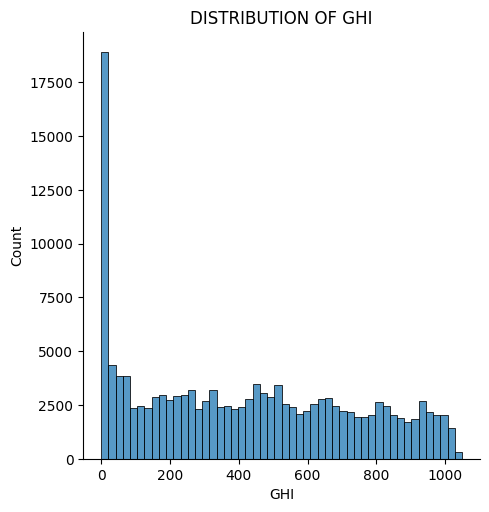

In [ ]:
# Visualizing the distribution of the target variable 'GHI'
sns.displot(solar_ir_df_nondark_encoded['GHI']);
plt.title("DISTRIBUTION OF GHI")

# Computing skewness and kurtosis of the 'GHI' column
print("Skewness: %f" % solar_ir_df_nondark_encoded['GHI'].skew())
print("Kurtosis: %f" % solar_ir_df_nondark_encoded['GHI'].kurt())

1. The distribution appears to be right-skewed, meaning that there are more small values and fewer larger values. This can be confirmed by the positive skewness value of 0.247625, which indicates a right-skewed distribution.
2. The distribution plot shows that the 'GHI' values are concentrated between 0 and 600, with a large peak around 0 and a smaller peak around 500.
3. The distribution has a kurtosis value of -1.173392, which indicates that it is slightly platykurtic (flatter than a normal distribution) with fewer values in the tails and more values concentrated around the mean.
4. The presence of a large peak around 0 in the distribution suggests that there are many instances where the GHI value is very low or zero, which could be due to factors such as cloud cover, or other environmental conditions affecting the amount of solar radiation received.
5. The smaller peak around 500 represents instances where the GHI value is relatively high, likely corresponding to clear sky conditions with high solar radiation levels.

# Bivariate Analysis

<ipython-input-23-c74af11921b4>:16: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


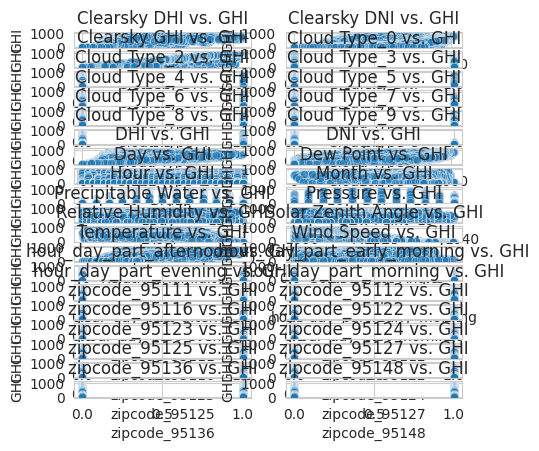

In [ ]:
# Features to exclude from the visualization
features_to_exclude = ['zipcode', 'Year']

# Specify the variable to be plotted against 'GHI'
variables_to_plot = solar_ir_df_nondark_encoded.columns.difference(['GHI'] + features_to_exclude)

# Create a compact grid of scatter plots
plt.figure(figsize=(5, 5))
sns.set_style("whitegrid")

for i, variable in enumerate(variables_to_plot, start=1):
    plt.subplot(len(variables_to_plot)//2 + 1, 2, i)
    sns.scatterplot(x=variable, y='GHI', data=solar_ir_df_nondark_encoded, alpha=0.5)
    plt.title(f'{variable} vs. GHI')

plt.tight_layout()
plt.show()

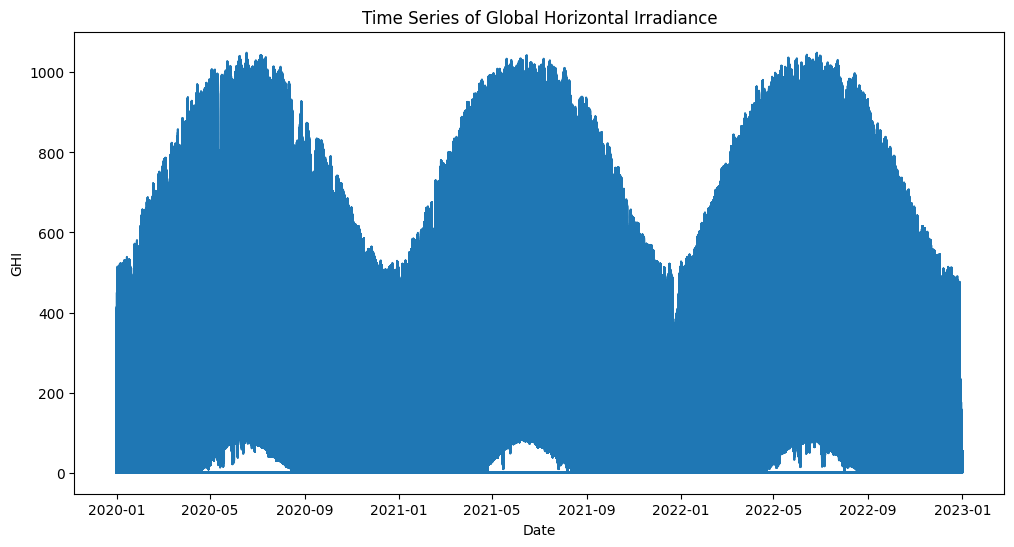

In [ ]:
data = solar_ir_df_nondark_encoded

# Create a datetime index
solar_ir_df_nondark_encoded['datetime'] = pd.to_datetime(solar_ir_df_nondark_encoded[['Year', 'Month', 'Day', 'Hour']])

# Set the datetime as the index
data = data.set_index('datetime')

# Plot the time series chart
plt.figure(figsize=(12, 6))
plt.plot(data.index, solar_ir_df_nondark_encoded['GHI'])
plt.xlabel('Date')
plt.ylabel('GHI')
plt.title('Time Series of Global Horizontal Irradiance')
plt.show()

The time series chart of Global Horizontal Irradiance (GHI) shows a clear seasonal pattern with three distinct peaks, which is consistent with the expected behavior of solar irradiance over the course of a year.
Here are the key insights from the chart:

1. Periodic Peaks: The chart exhibits three distinct peaks, which correspond to the summer months when the sun is at a higher angle, and the days are longer, leading to higher levels of solar irradiance.
2. Seasonal Variation: The periodic peaks are separated by periods of lower GHI values, which represent the winter months when the sun's angle is lower, and the days are shorter, resulting in less solar irradiance.
3. Varying Peak Magnitudes: The magnitudes of the peaks are not identical, with one peak appearing slightly higher than the others. This variation could be due to differences in weather conditions, such as cloud cover or atmospheric factors, during those specific periods.
4. Daily Fluctuations: Within each peak, there are visible fluctuations in the GHI values, which are likely due to the daily variation in solar irradiance caused by factors like cloud cover, atmospheric conditions, and the changing angle of the sun throughout the day.
5. Time Range: The time range of the data appears to be approximately three years, spanning from the beginning of 2020 to the beginning of 2023, based on the x-axis labels.

Overall, the time series chart clearly shows the expected seasonal pattern of solar irradiance, with higher values during the summer months and lower values during the winter months. The varying peak magnitudes and daily fluctuations within the peaks highlight the influence of weather conditions and other factors on the amount of solar irradiance received.

<ipython-input-88-a04d1557fac1>:5: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  ax = sns.pointplot(x='Month', y='value', hue='variable', data=plot_data, marker="o", palette=sns.color_palette("Spectral"))


Text(0, 0.5, 'Mean Values (W/m²)')

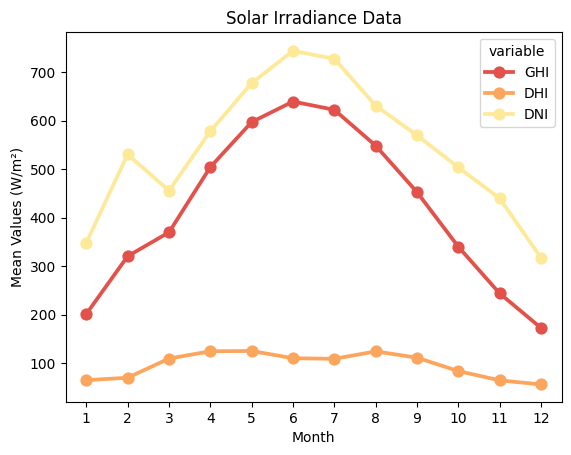

In [ ]:
# Reshape the DataFrame using pd.melt()
plot_data = pd.melt(solar_ir_df_nondark_encoded, id_vars=['Month'], value_vars=['GHI', 'DHI', 'DNI'])

# Plot the data
ax = sns.pointplot(x='Month', y='value', hue='variable', data=plot_data, marker="o", palette=sns.color_palette("Spectral"))
# Set title and axis labels
plt.title('Solar Irradiance Data')
plt.xlabel('Month')
plt.ylabel('Mean Values (W/m²)')

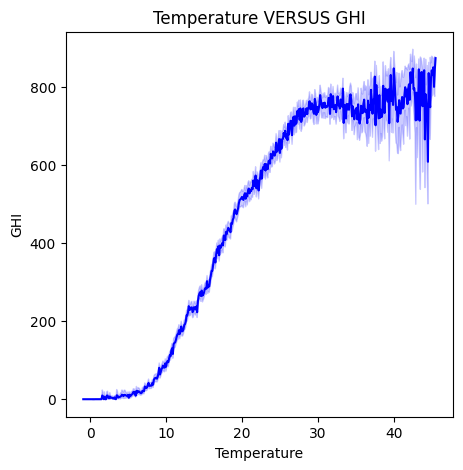

In [ ]:
plt.figure(figsize=(5,5))
sns.lineplot(x='Temperature',y='GHI',data=solar_ir_df_nondark_encoded,color='blue')
plt.title("Temperature VERSUS GHI")
plt.show()

The line plot highlights a non-linear, positive relationship between temperature and solar radiation (GHI), where higher temperatures are generally associated with higher levels of solar radiation, but with significant variation and potential saturation effects at higher temperatures. This relationship is likely influenced by various atmospheric and environmental factors that are not directly captured in this plot.
At lower temperatures (around 0-10°C), the GHI values are concentrated near zero, indicating low or no solar radiation.
As the temperature increases (approximately 10-25°C), the GHI values start to increase rapidly, suggesting that higher temperatures are associated with higher levels of solar radiation.
Beyond a certain temperature (around 25-30°C), the GHI values seem to plateau or even decrease slightly, indicating a potential saturation effect or the influence of other factors affecting solar radiation.
There is a significant amount of variation in the GHI values at higher temperatures, which could be attributed to other variables such as cloud cover, humidity, or atmospheric conditions.

Text(0.5, 1.0, 'Hour VERSUS GHI')

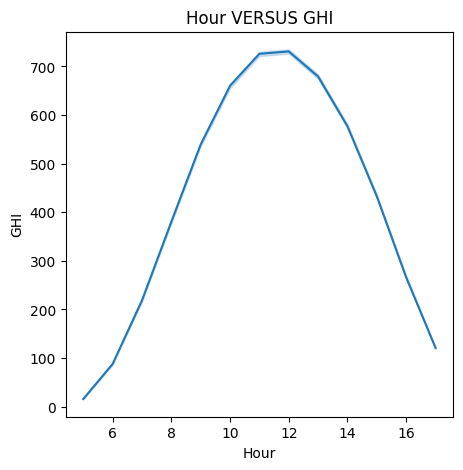

In [ ]:
plt.figure(figsize=(5,5))
sns.lineplot(x='Hour',y='GHI',data=solar_ir_df_nondark_encoded)
plt.title("Hour VERSUS GHI")

The graph depicts a curve in the shape of a bell, with GHI values increasing from around 6 AM, reaching a peak around 11 AM to 12 PM, and then decreasing again until 4 PM.
This pattern suggests that the GHI variable, which likely represents Global Horizontal Irradiance or solar radiation intensity, follows a diurnal cycle, reaching its maximum around midday when the sun is at its highest point and then decreasing towards the evening hours.

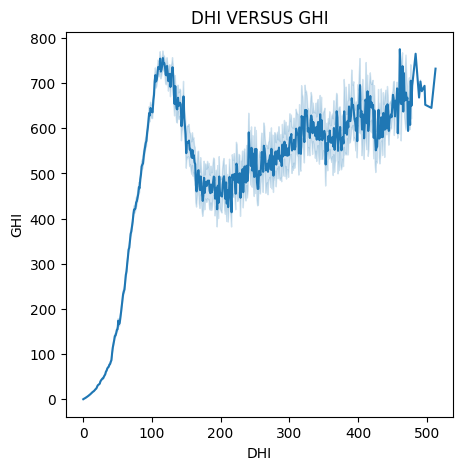

In [ ]:
plt.figure(figsize=(5,5))
sns.lineplot(x='DHI',y='GHI',data=solar_ir_df_nondark_encoded)
plt.title("DHI VERSUS GHI")
plt.show()

The plot displays a non-linear relationship between DHI and GHI. At lower values of DHI, the GHI values increase rapidly, forming a steep curve. As DHI increases further, the rate of increase in GHI slows down, and the curve appears to flatten out.
Overall, the plot suggests a positive correlation between DHI and GHI, where higher values of DHI generally correspond to higher values of GHI, but the relationship is not strictly linear.

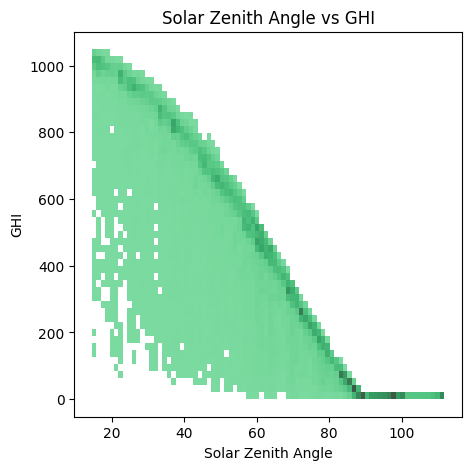

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(x='Solar Zenith Angle',y='GHI',data=solar_ir_df_nondark_encoded,color='seagreen')
plt.title("Solar Zenith Angle vs GHI")
plt.show()

The plot effectively illustrates the inverse correlation between Solar Zenith Angle and GHI, where lower Solar Zenith Angles (closer to the sun's position being directly overhead) correspond to higher GHI values, while higher Solar Zenith Angles (sun's position being more oblique) result in lower GHI values.

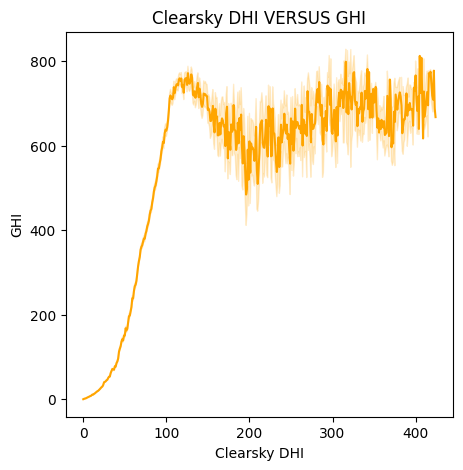

In [ ]:
plt.figure(figsize=(5,5))
sns.lineplot(x='Clearsky DHI',y='GHI',data=solar_ir_df_nondark_encoded,color='orange')
plt.title("Clearsky DHI VERSUS GHI")
plt.show()

The plot displays a distinct curve, where the GHI values start increasing rapidly for low Clearsky DHI values, forming a steep curve initially. As the Clearsky DHI values increase further, the rate of increase in GHI slows down, and the curve flattens out, showing a non-linear relationship between the two variables.

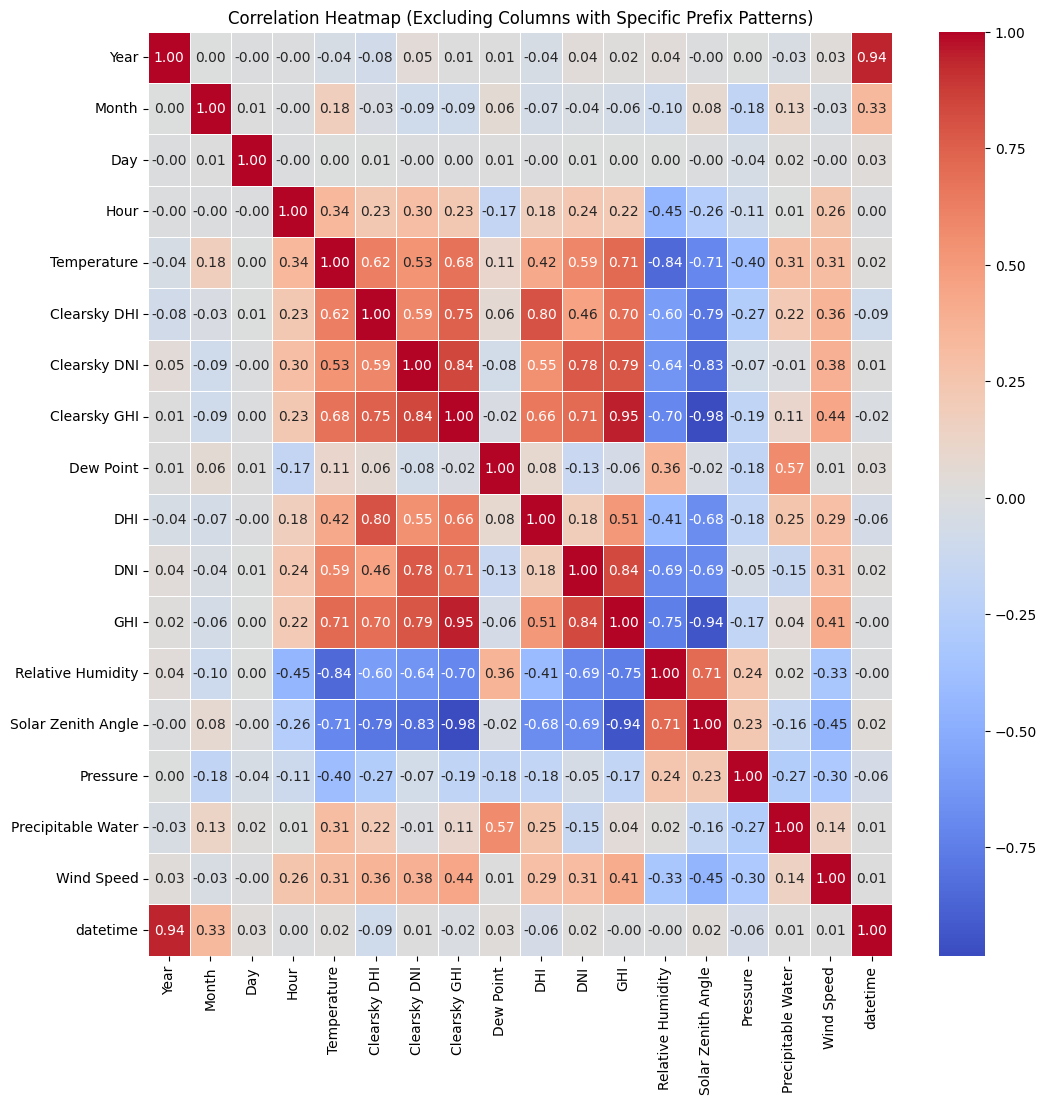

In [ ]:
# Getting columns to exclude based on prefix patterns
columns_to_exclude = [col for col in solar_ir_df_nondark_encoded.columns if any(re.match(pattern, col) for pattern in columns_to_encode)]

# Dropping columns with specified prefix patterns
df_for_correlation = solar_ir_df_nondark_encoded.drop(columns=columns_to_exclude)

# Computing the correlation matrix
correlation_matrix = df_for_correlation.corr()

# Creating a heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Excluding Columns with Specific Prefix Patterns)")
plt.show()

According to the correlation heatmap, GHI (Global Horizontal Irradiance) has a strong positive correlation with Temperature (0.71), Clearsky DNI (0.79), and Clearsky GHI (0.95). This indicates that higher GHI values are associated with higher temperatures, higher direct normal irradiance under clear sky conditions (Clearsky DNI), and higher global horizontal irradiance under clear sky conditions (Clearsky GHI).
GHI also shows moderate positive correlations with Dew Point (0.51), DHI (0.66), and DNI (0.71), suggesting that higher GHI is generally linked to higher dew point temperatures, diffuse horizontal irradiance (DHI), and direct normal irradiance (DNI).
On the other hand, GHI exhibits moderate negative correlations with Relative Humidity (-0.69) and Solar Zenith Angle (-0.63), implying that higher GHI tends to occur when relative humidity is lower and the sun's zenith angle is smaller (closer to overhead).
Overall, the heatmap indicates that GHI has strong positive correlations with other solar irradiance components and temperature-related variables, while having negative correlations with relative humidity and solar zenith angle.

Remove ClearSky GHI, DNI, DHI and also solar zenith angle as we are using this to calculate the GHI. Even DHI can be removed as we use it in calculating the GHI

In [ ]:
# Dropping the "Clearsky GHI","Clearsky DHI","Clearsky DNI","DHI", 'Solar Zenith Angle'
columns_to_drop = ["Clearsky GHI", "Clearsky DHI", "Clearsky DNI", "DHI", "DNI", "Solar Zenith Angle","Relative Humidity"]
solar_ir_df_nondark_encoded.drop(columns=columns_to_drop, inplace=True)

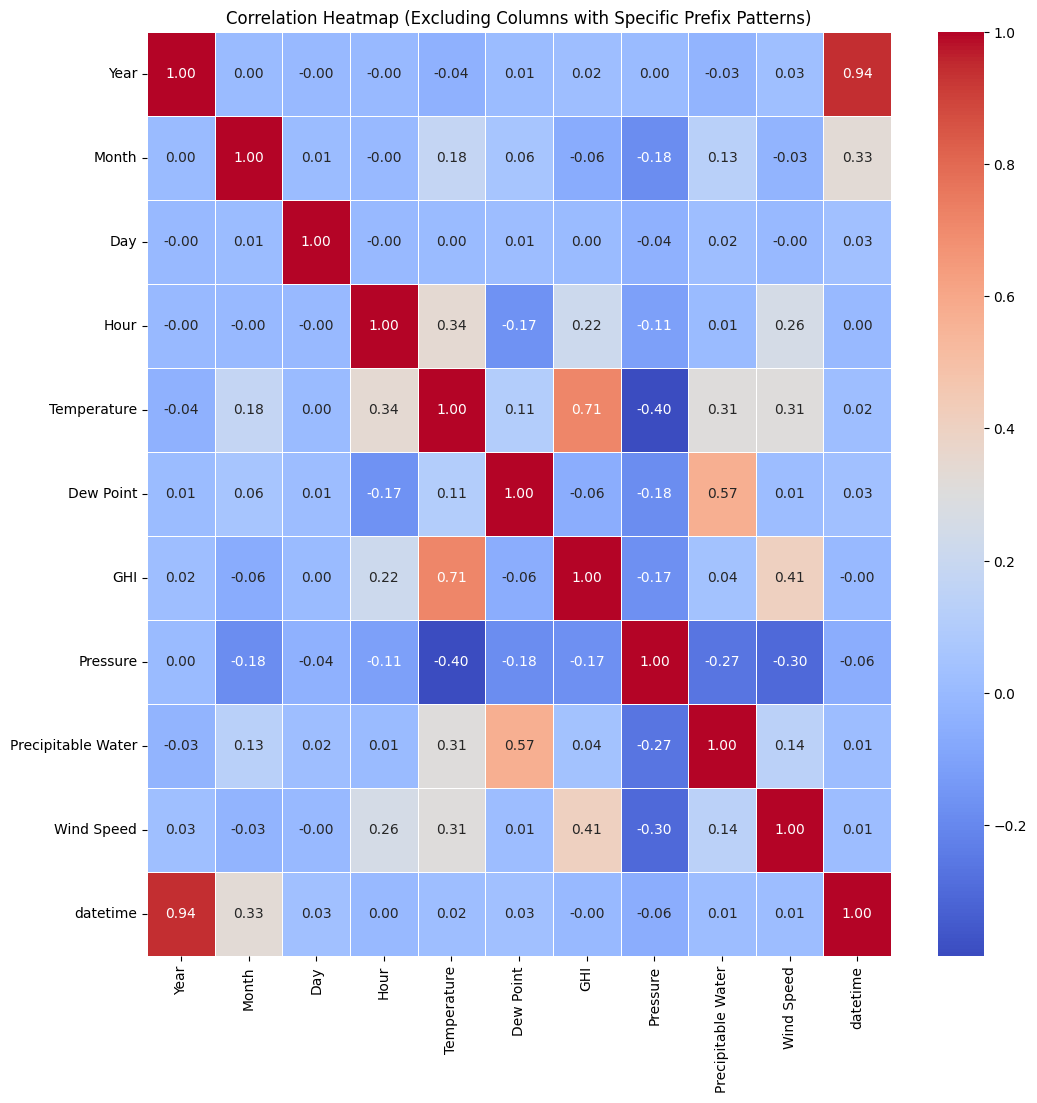

In [ ]:
# Getting columns to exclude based on prefix patterns
columns_to_exclude = [col for col in solar_ir_df_nondark_encoded.columns if any(re.match(pattern, col) for pattern in columns_to_encode)]

# Dropping columns with specified prefix patterns
df_for_correlation = solar_ir_df_nondark_encoded.drop(columns=columns_to_exclude)

# Computing the correlation matrix
correlation_matrix = df_for_correlation.corr()

# Creating a heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Excluding Columns with Specific Prefix Patterns)")
plt.show()

From the correlation heatmap, we can observe the following about GHI (Global Horizontal Irradiance):

GHI has a strong positive correlation of 0.71 with Temperature. This indicates that higher GHI values are associated with higher temperatures.
GHI has a weak negative correlation of -0.17 with both Pressure and Dew Point. This suggests that higher GHI tends to occur with slightly lower pressure and dew point values.
GHI shows a moderate positive correlation of 0.41 with Wind Speed, implying that higher wind speeds are generally linked to higher GHI values in this dataset.
GHI has a near-zero correlation of -0.00 with the "datetime" column, indicating that GHI does not exhibit a significant trend or relationship with the timestamp or time index represented by "datetime".

Overall, the correlation heatmap reveals that GHI has a strong positive relationship with Temperature and a moderate positive relationship with Wind Speed, while showing weak negative correlations with Pressure and Dew Point. However, GHI does not seem to have a significant correlation with the "datetime" variable in this dataset.

Modeling

In [ ]:
#Importing the required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor # for VIF
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm

In [ ]:
modeling_df= solar_ir_df_nondark_encoded.copy()

In [ ]:
solar_ir_df_nondark_encoded.shape

(142480, 34)

In [ ]:
modeling_df.shape

(142480, 34)

In [ ]:
# Separating features (X) and target variable (y)
X = modeling_df.drop(columns=['GHI'])
y = modeling_df['GHI']

In [ ]:
# Splitting the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
print("Data types of features (X_train):", X_train.dtypes)
print("Data type of target variable (y_train):", y_train.dtype)
print("Shape of features (X_train):", X_train.shape)
print("Shape of target variable (y_train):", y_train.shape)

Data types of features (X_train): Year                                    int64
Month                                   int64
Day                                     int64
Hour                                    int64
Temperature                           float64
Dew Point                             float64
Pressure                                int64
Precipitable Water                    float64
Wind Speed                            float64
Cloud Type_0                            int64
Cloud Type_2                            int64
Cloud Type_3                            int64
Cloud Type_4                            int64
Cloud Type_5                            int64
Cloud Type_6                            int64
Cloud Type_7                            int64
Cloud Type_8                            int64
Cloud Type_9                            int64
zipcode_95111                           int64
zipcode_95112                           int64
zipcode_95116                           int64


### Modeling - Linear regression

In [ ]:
# Selecting only numeric features
numeric_features = X_train.select_dtypes(include=['int64', 'float64'])

# Initializing and training a linear regression model
mlr_model = LinearRegression()
mlr_model.fit(numeric_features, y_train)

# Making predictions on the testing set
mlr_y_pred = mlr_model.predict(numeric_features)

# Evaluating the model using MSE
mlr_base_mse = mean_squared_error(y_train, mlr_y_pred)
print("Mean squared error of linear regression model:", mlr_base_mse)

Mean squared error of linear regression model: 19263.426442981854


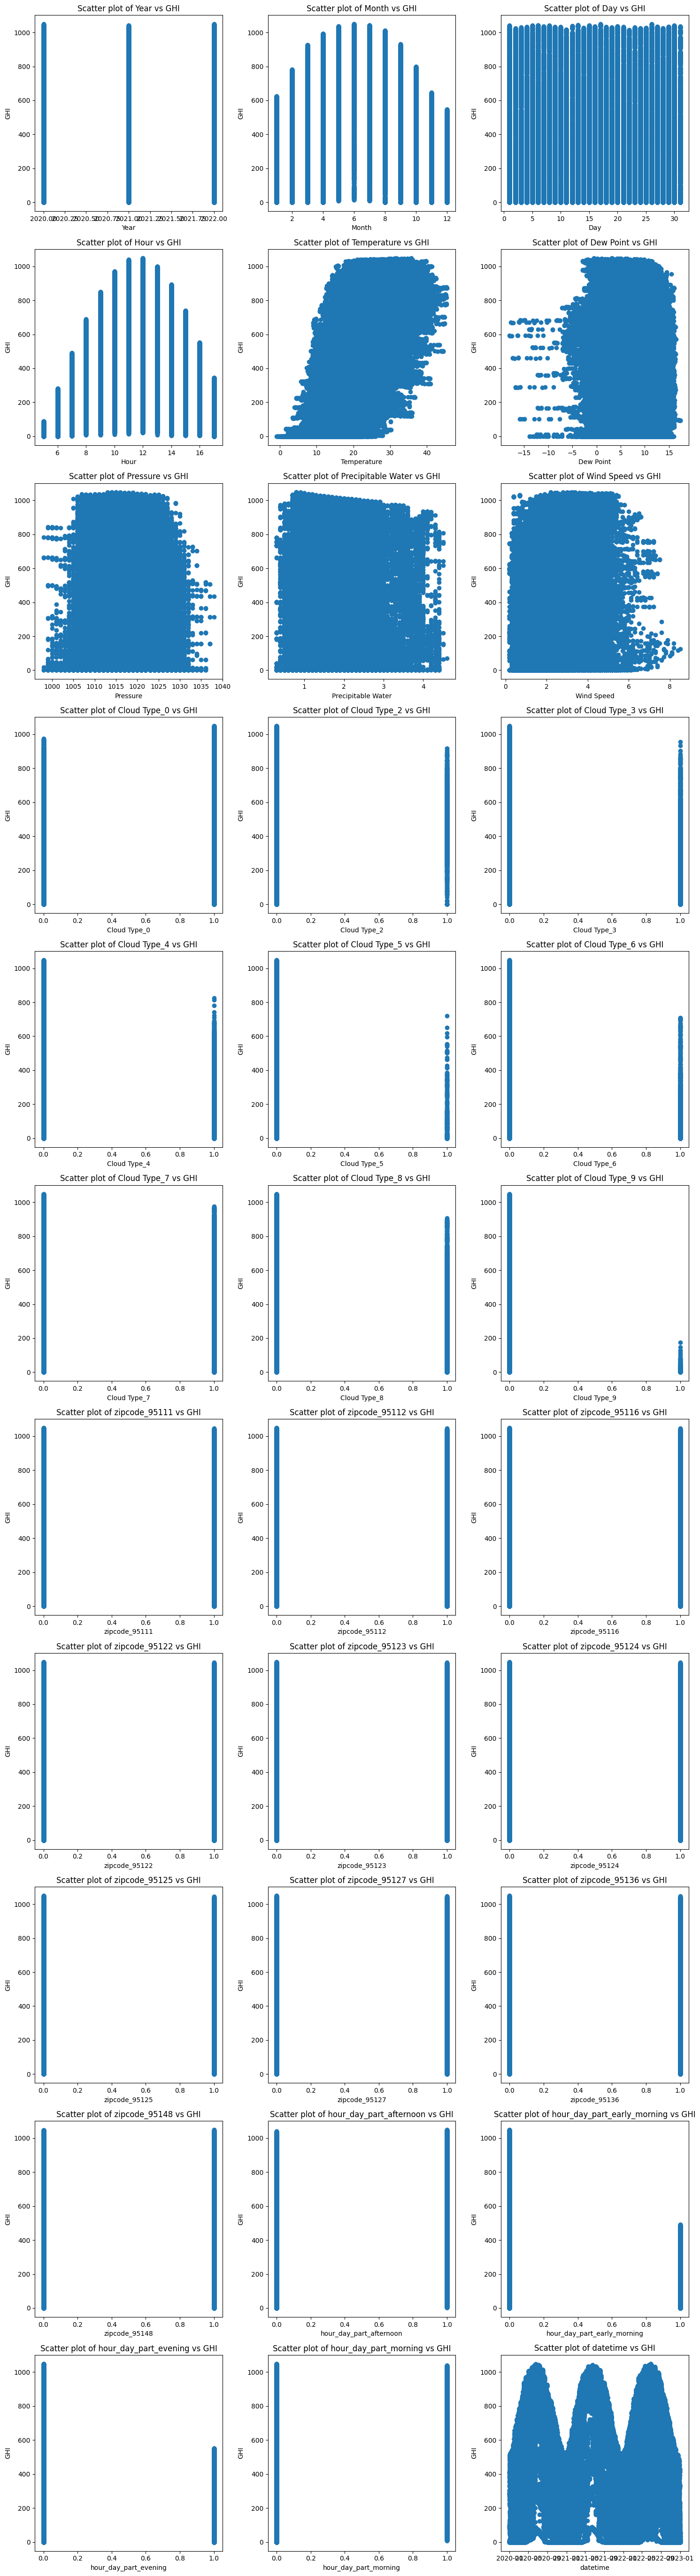

In [ ]:
# Linearity check

# Calculating the number of rows and columns for the subplot grid
num_features = len(X.columns)
num_cols = 3  # Number of columns for the subplot grid
num_rows = math.ceil(num_features / num_cols)

# Creating a subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flattening the axes array for easy iteration
axes = axes.flatten()

# Plotting scatter plots for each independent variable against the dependent variable
for i, column in enumerate(X.columns):
    axes[i].scatter(X[column], y)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('GHI')
    axes[i].set_title(f'Scatter plot of {column} vs GHI')

# Hiding empty subplots
for j in range(num_features, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
print("Shape of y_test:", y_test.shape)
print("Shape of mlr_y_pred:", mlr_y_pred.shape)

Shape of y_test: (42744,)
Shape of mlr_y_pred: (99736,)


In [ ]:
# Re-train the model using the correct training data
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

# Make predictions on the testing set
mlr_y_pred = mlr_model.predict(X_test)

# Compute residuals
residuals = y_test - mlr_y_pred

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.DateTime64DType'>)

In [ ]:
# Homoscedasticity check
# Residual plot
residuals = y_test - mlr_y_pred
plt.scatter(mlr_y_pred, residuals)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Homoscedasticity plot
sns.residplot(x=mlr_y_pred.flatten(), y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Plot")
plt.show()

ValueError: operands could not be broadcast together with shapes (42744,) (99736,) 

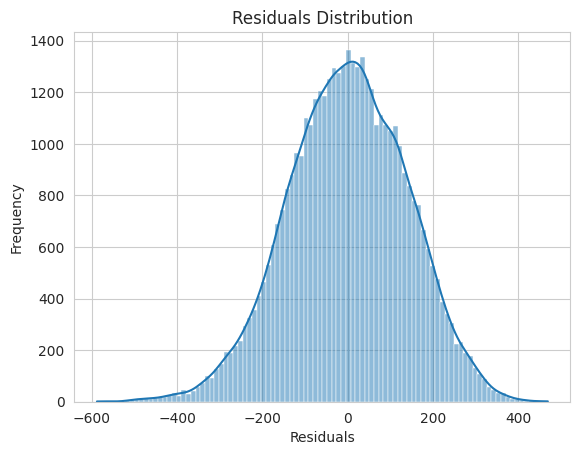

In [ ]:
# Normality assumption
# Normality plot i.e. Q-Q plot
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                       Variable        VIF
0                          Year   1.031961
1                         Month   1.092343
2                           Day   1.006153
3                          Hour  14.984711
4                   Temperature   2.377958
5                     Dew Point   1.646358
6                      Pressure   1.911031
7            Precipitable Water   1.886541
8                    Wind Speed   1.428997
9                  Cloud Type_0        inf
10                 Cloud Type_2        inf
11                 Cloud Type_3        inf
12                 Cloud Type_4        inf
13                 Cloud Type_5        inf
14                 Cloud Type_6        inf
15                 Cloud Type_7        inf
16                 Cloud Type_8        inf
17                 Cloud Type_9        inf
18                zipcode_95111        inf
19                zipcode_95112        inf
20                zipcode_95116        inf
21                zipcode_95122        inf
22         

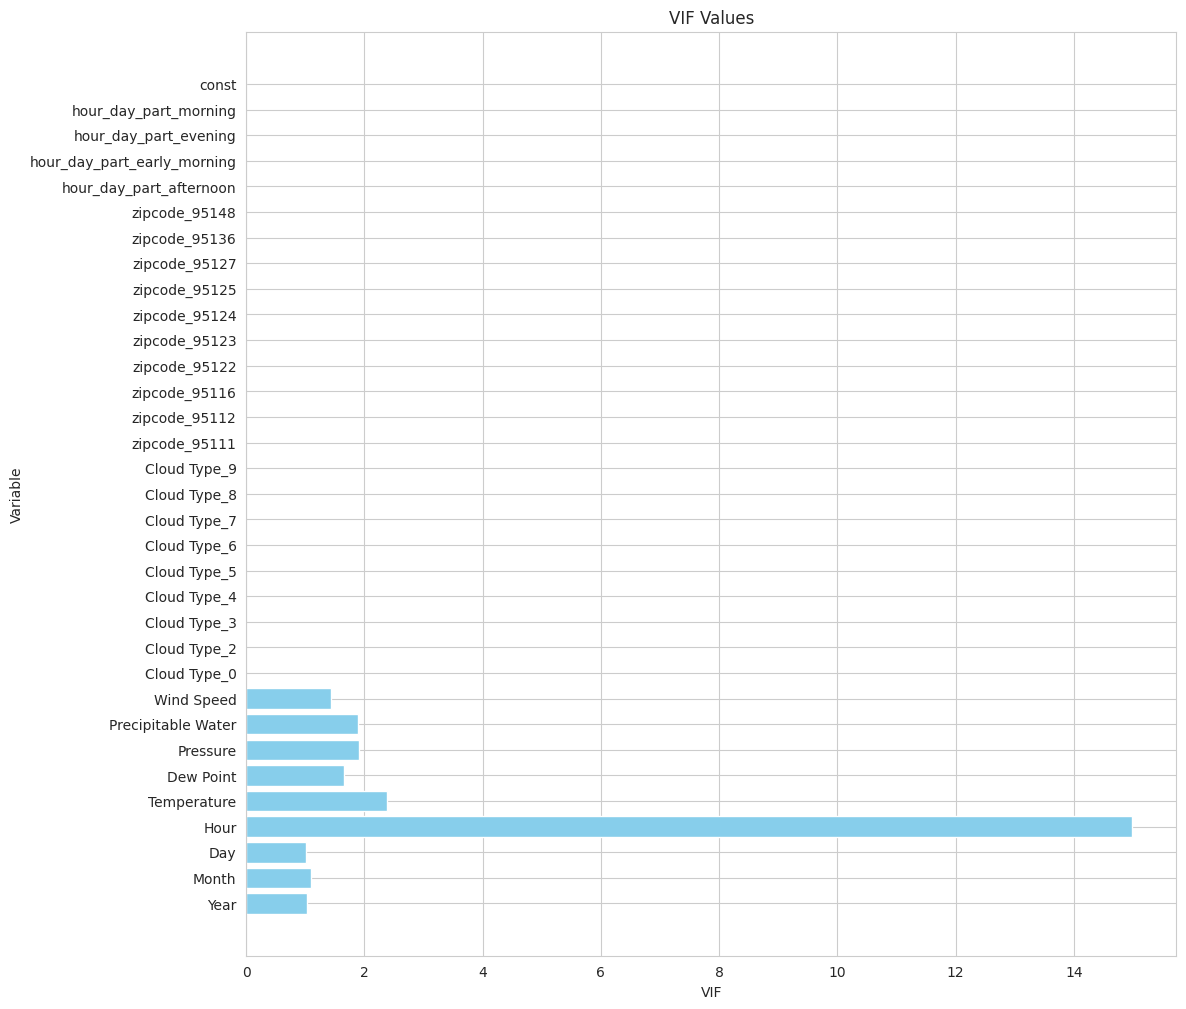

In [ ]:
# Multicollinearity assumption

# Calculating VIF for each predictor variable
vif_data = X.assign(const=1)  # Adding constant for intercept term
vif = pd.DataFrame()
vif["Variable"] = vif_data.columns
vif["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

print(vif)

# Plotting VIF values
plt.figure(figsize=(12, 12))
plt.barh(vif["Variable"], vif["VIF"], color='skyblue')
plt.xlabel('VIF')
plt.ylabel('Variable')
plt.title('VIF Values')
plt.show()

In [ ]:
# Calculating evaluation metrics for linear regression
mlr_mse = mean_squared_error(y_test, mlr_y_pred)
mlr_rmse = mean_squared_error(y_test, mlr_y_pred, squared=False)  # RMSE
mlr_mae = mean_absolute_error(y_test, mlr_y_pred)
mlr_r2 = r2_score(y_test, mlr_y_pred)

print("Mean Squared Error (MSE) of  linear regression:", mlr_mse)
print("Root Mean Squared Error (RMSE) of linear regression:", mlr_rmse)
print("Mean Absolute Error (MAE) of  linear regression:", mlr_mae)
print("R-squared (R²) of linear regression:", mlr_r2)

Mean Squared Error (MSE) of  linear regression: 19474.732651798633
Root Mean Squared Error (RMSE) of linear regression: 139.55189949190455
Mean Absolute Error (MAE) of  linear regression: 111.84194090803389
R-squared (R²) of linear regression: 0.8032830231088364


In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
#plt.scatter(y_train, train_predictions, color='red', label='Train Data')
plt.scatter(y_test, mlr_y_pred, color='orange', label='Train Data')
#plt.scatter(y_test, test_predictions, color='blue', label='Test Data')
plt.plot([min(y), max(y)], [min(y), max(y)], color='green', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

### Modeling - Random Forest regression

In [ ]:
# Modeling iteration with default parameters i.e. base model
# Initializing and training a Random Forest Regression model
rf_model = RandomForestRegressor(random_state=123)
rf_model.fit(X_train, y_train)

# Making predictions on the testing set
rf_y_pred = rf_model.predict(X_test)

# Calculating evaluation metrics of the model
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = mean_squared_error(y_test, rf_y_pred, squared=False)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print("Mean Squared Error (MSE) of Random Forest Regression base model:", rf_mse)
print("Root Mean Squared Error (RMSE) of Random Forest Regression base model:", rf_rmse)
print("Mean Absolute Error (MAE) of Random Forest Regression base model:", rf_mae)
print("R-squared (R²) of Random Forest Regression base model:", rf_r2)

Mean Squared Error (MSE) of Random Forest Regression base model: 521.1579789818454
Root Mean Squared Error (RMSE) of Random Forest Regression base model: 22.828884751162185
Mean Absolute Error (MAE) of Random Forest Regression base model: 8.75799410443571
R-squared (R²) of Random Forest Regression base model: 0.9947357109367789


In [ ]:
# Hyperparameter tuning for the RF model
# Defining the grid of hyperparameters to search
param_grid_rf = {
    'max_depth': [8, 10],
    'n_estimators': [50, 100, 200],
    'min_samples_leaf': [1, 2, 4]
}

# Initializing and training the Grid Search CV
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=123), param_grid_rf, cv=2, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

# Obtaining the best parameters and the best model
best_params_rf = grid_search_rf.best_params_
best_rf_model = grid_search_rf.best_estimator_

# Making predictions on the testing set using the best model
best_rf_y_pred = best_rf_model.predict(X_test)

# Calculating evaluation metrics of the model
best_rf_mse = mean_squared_error(y_test, best_rf_y_pred)
best_rf_rmse = mean_squared_error(y_test, best_rf_y_pred, squared=False)
best_rf_mae = mean_absolute_error(y_test, best_rf_y_pred)
best_rf_r2 = r2_score(y_test, best_rf_y_pred)

print("Tuned Random Forest Regression:")
print("Best parameters after hyperparameter tuning of the RF model:", best_params_rf)
print("Mean Squared Error (MSE) of Random Forest Regression tuned model:", best_rf_mse)
print("Root Mean Squared Error (RMSE) of Random Forest Regression tuned model:", best_rf_rmse)
print("Mean Absolute Error (MAE) of Random Forest Regression tuned model:", best_rf_mae)
print("R-squared (R²) of Random Forest Regression tuned model:", best_rf_r2)

Tuned Random Forest Regression:
Best parameters after hyperparameter tuning of the RF model: {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 200}
Mean Squared Error (MSE) of Random Forest Regression tuned model: 2907.10417040341
Root Mean Squared Error (RMSE) of Random Forest Regression tuned model: 53.91756829089578
Mean Absolute Error (MAE) of Random Forest Regression tuned model: 32.649765950786595
R-squared (R²) of Random Forest Regression tuned model: 0.9706349373758085


XGBoost Regression

In [ ]:
# Define and train the XGBoost model
xgb_model = xgb.XGBRegressor(random_state=123)
xgb_model.fit(X_train, y_train)

# Making predictions on the testing set
xgb_y_pred = xgb_model.predict(X_test)

# Calculating evaluation metrics of the model
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_rmse = mean_squared_error(y_test, xgb_y_pred, squared=False)
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)

print("Mean Squared Error (MSE) of XGBoost Regression base model:", xgb_mse)
print("Root Mean Squared Error (RMSE) of XGBoost Regression base model:", xgb_rmse)
print("Mean Absolute Error (MAE) of XGBoost Regression base model:", xgb_mae)
print("R-squared (R²) of XGBoost Regression base model:", xgb_r2)

Mean Squared Error (MSE) of XGBoost Regression base model: 1119.118370514142
Root Mean Squared Error (RMSE) of XGBoost Regression base model: 33.453226608417644
Mean Absolute Error (MAE) of XGBoost Regression base model: 20.23036727192768
R-squared (R²) of XGBoost Regression base model: 0.9886956300470408


In [ ]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=2, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train, y_train)

# Obtaining the best parameters and the best model
best_params_xgb = grid_search_xgb.best_params_
best_xgb_model = grid_search_xgb.best_estimator_

# Making predictions on the testing set using the best model
best_xgb_y_pred = best_xgb_model.predict(X_test)

# Calculating evaluation metrics of the model
best_xgb_mse = mean_squared_error(y_test, best_xgb_y_pred)
best_xgb_rmse = mean_squared_error(y_test, best_xgb_y_pred, squared=False)
best_xgb_mae = mean_absolute_error(y_test, best_xgb_y_pred)
best_xgb_r2 = r2_score(y_test, best_xgb_y_pred)

print("Tuned XGboost Regression:")
print("Best Parameters:", best_params_xgb)
print("Mean Squared Error (MSE) of XGboost Regression tuned model:", best_xgb_mse)
print("Root Mean Squared Error (RMSE) of XGboost Regression tuned model:", best_xgb_rmse)
print("Mean Absolute Error (MAE) of XGboost Regression tuned model:", best_xgb_mae)
print("R-squared (R²) of XGboost Regression tuned model:", best_xgb_r2)


Fitting 2 folds for each of 9 candidates, totalling 18 fits
Tuned XGboost Regression:
Best Parameters: {'max_depth': 7, 'n_estimators': 300}
Mean Squared Error (MSE) of XGboost Regression tuned model: 675.4533119400144
Root Mean Squared Error (RMSE) of XGboost Regression tuned model: 25.989484641677958
Mean Absolute Error (MAE) of XGboost Regression tuned model: 14.242414463407801
R-squared (R²) of XGboost Regression tuned model: 0.9931771523680613


### Modeling - Support vector machine (SVM) regression

In [ ]:
# Modeling iteration with default parameters i.e. base model
# Initializing and training a Support Vector Machine Regression model
svm_model = SVR()
svm_model.fit(X_train, y_train)

# Making predictions on the testing set
svm_y_pred = svm_model.predict(X_test)

# Calculating evaluation metrics the model
svm_mse = mean_squared_error(y_test, svm_y_pred)
svm_rmse = mean_squared_error(y_test, svm_y_pred, squared=False)
svm_mae = mean_absolute_error(y_test, svm_y_pred)
svm_r2 = r2_score(y_test, svm_y_pred)

print("Mean Squared Error (MSE) of SVM Regression base model:", svm_mse)
print("Root Mean Squared Error (RMSE) of SVM Regression base model:", svm_rmse)
print("Mean Absolute Error (MAE) of SVM Regression base model:", svm_mae)
print("R-squared (R²) of SVM Regression base model:", svm_r2)

In [ ]:
# Hyperparameter tuning for the SVM model
# Defining the grid of hyperparameters to search
param_grid_svm = {
    'C': [0.1, 1, 10],
   # 'gamma': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf','poly']
}

# Initializing and training the Grid Search CV
grid_search_svm = GridSearchCV(SVR(), param_grid_svm, cv=2, scoring='neg_mean_squared_error')
grid_search_svm.fit(X_train, y_train)

# Obtaining the best parameters and the best model
best_params_svm = grid_search_svm.best_params_
best_svm_model = grid_search_svm.best_estimator_

# Making predictions on the testing set using the best model
best_svm_y_pred = best_svm_model.predict(X_test)

# Calculating evaluation metrics of the model
best_svm_mse = mean_squared_error(y_test, best_svm_y_pred)
best_svm_rmse = mean_squared_error(y_test, best_svm_y_pred, squared=False)
best_svm_mae = mean_absolute_error(y_test, best_svm_y_pred)
best_svm_r2 = r2_score(y_test, best_svm_y_pred)

print("Tuned Support Vector Machine (SVM) Regression:")
print("Best Parameters:", best_params_svm)
print("Mean Squared Error (MSE) of SVM Regression tuned model:", best_svm_mse)
print("Root Mean Squared Error (RMSE) of SVM Regression tuned model:", best_svm_rmse)
print("Mean Absolute Error (MAE) of SVM Regression tuned model:", best_svm_mae)
print("R-squared (R²) of SVM Regression tuned model:", best_svm_r2)

### Modeling - L1 regularization i.e. Lasso regression

In [ ]:
# Defining a range of alpha values to search
alphas_lasso = [0.01, 0.1, 1, 10, 100]

best_lasso_alpha = None
best_lasso_rmse = float('inf')

# Iterating over each alpha value and fitting a Lasso Regression model
for alpha in alphas_lasso:
    # Initializing and training a Lasso Regression model
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)

    # Making predictions on the testing set
    lasso_y_pred = lasso_model.predict(X_test)

    # Evaluating the model
    lasso_rmse = mean_squared_error(y_test, lasso_y_pred, squared=False)

    # Updating best alpha and RMSE if current RMSE is better
    if lasso_rmse < best_lasso_rmse:
        best_lasso_rmse = lasso_rmse
        best_lasso_alpha = alpha


# Calculating evaluation metrics of the model
best_lasso_mse = mean_squared_error(y_test, lasso_y_pred)
best_lasso_rmse = mean_squared_error(y_test, lasso_y_pred, squared=False)
best_lasso_mae = mean_absolute_error(y_test, lasso_y_pred)
best_lasso_r2 = r2_score(y_test, lasso_y_pred)

print("Best Lasso Regression (Alpha {}):".format(best_lasso_alpha))
#print("Root Mean Squared Error (RMSE) of Lasso model:", best_lasso_rmse)

print("Mean Squared Error (MSE) of L1/Lasso Regression tuned model:", best_lasso_mse)
print("Root Mean Squared Error (RMSE) of L1/Lasso Regression tuned model:", best_lasso_rmse)
print("Mean Absolute Error (MAE) of L1/Lasso Regression tuned model:", best_lasso_mae)
print("R-squared (R²) of L1/Lasso Regression tuned model:", best_lasso_r2)

Best Lasso Regression (Alpha 0.01):
Mean Squared Error (MSE) of L1/Lasso Regression tuned model: 45228.76266669747
Root Mean Squared Error (RMSE) of L1/Lasso Regression tuned model: 212.6705495988983
Mean Absolute Error (MAE) of L1/Lasso Regression tuned model: 174.46536744878898
R-squared (R²) of L1/Lasso Regression tuned model: 0.5431379922178842



### Modeling - L2 regularization i.e. Ridge regression

In [ ]:
# Defining a range of alpha values to search
alphas_ridge = [0.01, 0.1, 1, 10, 100]

best_ridge_alpha = None
best_ridge_rmse = float('inf')

# Iterating over each alpha value and fitting a Ridge Regression model
for alpha in alphas_ridge:
    # Initializing and training a Ridge Regression model
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)

    # Making predictions on the testing set
    ridge_y_pred = ridge_model.predict(X_test)

    # Evaluating the model
    ridge_rmse = mean_squared_error(y_test, ridge_y_pred, squared=False)

    # Updating best alpha and RMSE if current RMSE is better
    if ridge_rmse < best_ridge_rmse:
        best_ridge_rmse = ridge_rmse
        best_ridge_alpha = alpha


# Calculating evaluation metrics of the model
best_ridge_mse = mean_squared_error(y_test, ridge_y_pred)
best_ridge_rmse = mean_squared_error(y_test, ridge_y_pred, squared=False)
best_ridge_mae = mean_absolute_error(y_test, ridge_y_pred)
best_ridge_r2 = r2_score(y_test, ridge_y_pred)

print("Best Ridge Regression (Alpha {}):".format(best_ridge_alpha))
#print("Root Mean Squared Error (RMSE) of Ridge model:", best_ridge_rmse)

print("Mean Squared Error (MSE) of L2/Ridge Regression tuned model:", best_ridge_mse)
print("Root Mean Squared Error (RMSE) of L2/Ridge Regression tuned model:", best_ridge_rmse)
print("Mean Absolute Error (MAE) of L2/Ridge Regression tuned model:", best_ridge_mae)
print("R-squared (R²) of L2/Ridge Regression tuned model:", best_ridge_r2)

Best Ridge Regression (Alpha 0.01):
Mean Squared Error (MSE) of L2/Ridge Regression tuned model: 19481.622630326834
Root Mean Squared Error (RMSE) of L2/Ridge Regression tuned model: 139.5765833882132
Mean Absolute Error (MAE) of L2/Ridge Regression tuned model: 111.83953490566027
R-squared (R²) of L2/Ridge Regression tuned model: 0.8032134264796478


Modeling - model comparsion

In [ ]:
# Creating a dictionary to store the evaluation metrics for each model
regression_evaluation_metrics = {
    'Linear Regression': {'MSE': mlr_mse, 'RMSE': mlr_rmse, 'MAE': mlr_mae, 'R²': mlr_r2},
    'Random Forest Regression base model': {'MSE': rf_mse, 'RMSE': rf_rmse, 'MAE': rf_mae, 'R²': rf_r2},
    'Random Forest Regression tuned model': {'MSE': best_rf_mse, 'RMSE': best_rf_rmse, 'MAE': best_rf_mae, 'R²': best_rf_r2},
    #'Support Vector Machine (SVM) Regression base model': {'MSE': svm_mse, 'RMSE': svm_rmse, 'MAE': svm_mae, 'R²': svm_r2},
    'XGboost Regression base model': {'MSE': xgb_mse, 'RMSE': xgb_rmse, 'MAE': xgb_mae, 'R²': xgb_r2},
    'XGboost Regression tuned model': {'MSE': best_xgb_mse, 'RMSE': best_xgb_rmse, 'MAE': best_xgb_mae, 'R²': best_xgb_r2},
    #'SVM Regression tuned model': {'MSE': best_svm_mse, 'RMSE': best_svm_rmse, 'MAE': best_svm_mae, 'R²': best_svm_r2},
    'L1/Lasso Regression tuned model': {'MSE': best_lasso_mse, 'RMSE': best_lasso_rmse, 'MAE': best_lasso_mae, 'R²': best_lasso_r2},
    'L2/Ridge Regression tuned model': {'MSE': best_ridge_mse, 'RMSE': best_ridge_rmse, 'MAE': best_ridge_mae, 'R²': best_ridge_r2},
}

# Converting the dictionary to a DataFrame for better visualization
evaluation_metrics_df = pd.DataFrame.from_dict(regression_evaluation_metrics, orient='index')

# Printing the df
print("Performance Comparison of Different Models:")
print(evaluation_metrics_df)

Performance Comparison of Different Models:
                                               MSE        RMSE         MAE  \
Linear Regression                     19474.732652  139.551899  111.841941   
Random Forest Regression base model     521.157979   22.828885    8.757994   
Random Forest Regression tuned model   2907.104170   53.917568   32.649766   
XGboost Regression base model          1119.118371   33.453227   20.230367   
XGboost Regression tuned model          675.453312   25.989485   14.242414   
L1/Lasso Regression tuned model       45228.762667  212.670550  174.465367   
L2/Ridge Regression tuned model       19481.622630  139.576583  111.839535   

                                            R²  
Linear Regression                     0.803283  
Random Forest Regression base model   0.994736  
Random Forest Regression tuned model  0.970635  
XGboost Regression base model         0.988696  
XGboost Regression tuned model        0.993177  
L1/Lasso Regression tuned model      

### Modeling - feature importance and explainability
#### Feature importance of Linear regression

In [ ]:
# Extracting coefficients from the trained linear regression model
lr_coefficients = mlr_model.coef_

# Creating a DataFrame to store feature names and their coefficients
lr_coefficients_df = pd.DataFrame({'Feature': X.columns, 'LR coefficient': lr_coefficients})

# Sorting the DataFrame by absolute coefficient value in descending order
lr_coefficients_df['Absolute_Coefficient'] = lr_coefficients_df['LR coefficient'].abs()
lr_coefficients_df = lr_coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Printing or visualizing the feature importance
print("Feature Importance (Linear Regression):")
print(lr_coefficients_df)

Feature Importance (Linear Regression):
                        Feature  LR coefficient  Absolute_Coefficient
31        hour_day_part_morning      160.119603            160.119603
30        hour_day_part_evening     -142.694388            142.694388
29  hour_day_part_early_morning     -139.472547            139.472547
28      hour_day_part_afternoon      122.047331            122.047331
9                  Cloud Type_0      117.862663            117.862663
17                 Cloud Type_9      -74.610637             74.610637
10                 Cloud Type_2       70.119950             70.119950
11                 Cloud Type_3      -59.488649             59.488649
8                    Wind Speed       58.011372             58.011372
23                zipcode_95124       53.277623             53.277623
22                zipcode_95123       41.326500             41.326500
12                 Cloud Type_4      -41.136178             41.136178
14                 Cloud Type_6      -36.378266   

In [ ]:
# Fitting the multiple linear regression model
mlr_model_ols = sm.OLS(y, sm.add_constant(X)).fit()

# Extracting coefficients and p-values from the trained linear regression model
lr_coefficients_ols = mlr_model_ols.params
lr_pvalues_ols = mlr_model_ols.pvalues

# Creating a DataFrame to store feature names, coefficients, and p-values
lr_summary_ols_df = pd.DataFrame({'Feature': ['Intercept'] + list(X.columns),
                              'Coefficient': lr_coefficients_ols,
                              'P-value': lr_pvalues_ols})

# Sorting the DataFrame by absolute coefficient value in descending order
lr_summary_ols_df['Absolute_Coefficient'] = lr_summary_ols_df['Coefficient'].abs()
lr_summary_ols_df = lr_summary_ols_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Printing or visualizing the feature importance
print("Feature Importance (Linear Regression):")
print(lr_summary_ols_df)

# Optional
# Filtering out features with p-value > 0.05 since they're not significant
lr_summary_ols_df_filtered = lr_summary_ols_df[lr_summary_ols_df['P-value'] <= 0.05]
print("\nSignificant Features (p-value <= 0.05):")
print(lr_summary_ols_df_filtered[['Feature', 'Coefficient', 'P-value']])


Feature Importance (Linear Regression):
                                                 Feature   Coefficient  \
const                                          Intercept -19587.859895   
hour_day_part_evening              hour_day_part_evening  -5041.046574   
hour_day_part_early_morning  hour_day_part_early_morning  -5035.561941   
hour_day_part_afternoon          hour_day_part_afternoon  -4774.940475   
hour_day_part_morning              hour_day_part_morning  -4736.310906   
Cloud Type_9                                Cloud Type_9  -2261.044876   
Cloud Type_3                                Cloud Type_3  -2236.592994   
Cloud Type_4                                Cloud Type_4  -2216.079374   
Cloud Type_6                                Cloud Type_6  -2211.840184   
Cloud Type_5                                Cloud Type_5  -2185.209804   
Cloud Type_8                                Cloud Type_8  -2167.925805   
Cloud Type_7                                Cloud Type_7  -2144.493289  

Text(0, 0.5, 'Feature')

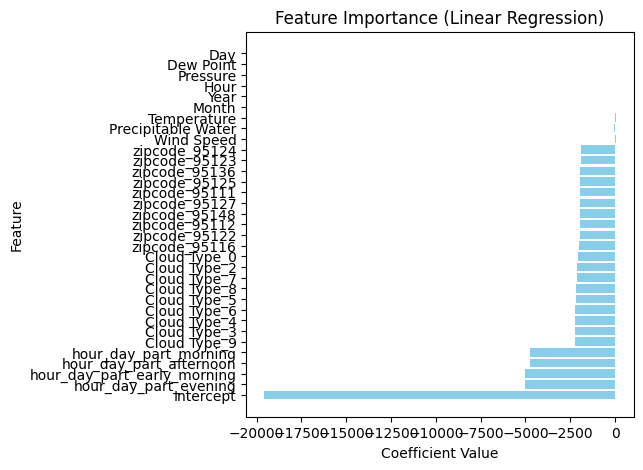

In [ ]:
# Setting up the figure and axes
plt.figure(figsize=(5,5))

# Plotting feature importance from Linear Regression
plt.barh(y=lr_summary_ols_df['Feature'], width=lr_summary_ols_df['Coefficient'], color='skyblue')
plt.title('Feature Importance (Linear Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')

Actual vs predicted values

#### Feature importance of Random Forest

In [ ]:
# Extracting feature importance from the tuned RF model
rf_feature_importance = best_rf_model.feature_importances_ #changed best_rf_model to best_model

# Creating a DataFrame to store feature names and their importance scores
rf_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance from RF': rf_feature_importance})

# Sorting the DataFrame by importance score in descending order
rf_importance_df = rf_importance_df.sort_values(by='Importance from RF', ascending=False)

# Printing or visualizing the feature importance
print("Feature Importance (Random Forest):")
print(rf_importance_df)

Feature Importance (Random Forest):
                        Feature  Importance from RF
4                   Temperature        4.378865e-01
3                          Hour        2.750793e-01
1                         Month        1.225088e-01
30        hour_day_part_evening        5.760524e-02
9                  Cloud Type_0        4.912705e-02
29  hour_day_part_early_morning        3.810416e-02
8                    Wind Speed        4.745500e-03
2                           Day        2.565931e-03
7            Precipitable Water        2.305837e-03
5                     Dew Point        2.070547e-03
31        hour_day_part_morning        1.728366e-03
12                 Cloud Type_4        1.692452e-03
15                 Cloud Type_7        1.502085e-03
11                 Cloud Type_3        8.277715e-04
10                 Cloud Type_2        7.733802e-04
0                          Year        6.150576e-04
28      hour_day_part_afternoon        3.404695e-04
6                      Press

In [ ]:
# Extracting feature importance from the tuned XGB model
xgb_feature_importance = best_xgb_model.feature_importances_

# Creating a DataFrame to store feature names and their importance scores
xgb_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance from XGBoost': xgb_feature_importance})

# Sorting the DataFrame by importance score in descending order
xgb_importance_df = xgb_importance_df.sort_values(by='Importance from XGBoost', ascending=False)

# Printing or visualizing the feature importance
print("Feature Importance (XGBoost):")
print(xgb_importance_df)

Feature Importance (XGBoost):
                        Feature  Importance from XGBoost
3                          Hour                 0.280824
4                   Temperature                 0.238169
9                  Cloud Type_0                 0.183323
1                         Month                 0.134141
28      hour_day_part_afternoon                 0.033947
31        hour_day_part_morning                 0.032285
12                 Cloud Type_4                 0.014240
10                 Cloud Type_2                 0.010192
15                 Cloud Type_7                 0.009432
14                 Cloud Type_6                 0.009001
17                 Cloud Type_9                 0.008713
8                    Wind Speed                 0.007247
7            Precipitable Water                 0.006747
11                 Cloud Type_3                 0.005601
5                     Dew Point                 0.005282
2                           Day                 0.004160
0

Feature Importance for Random Forest and XGboost

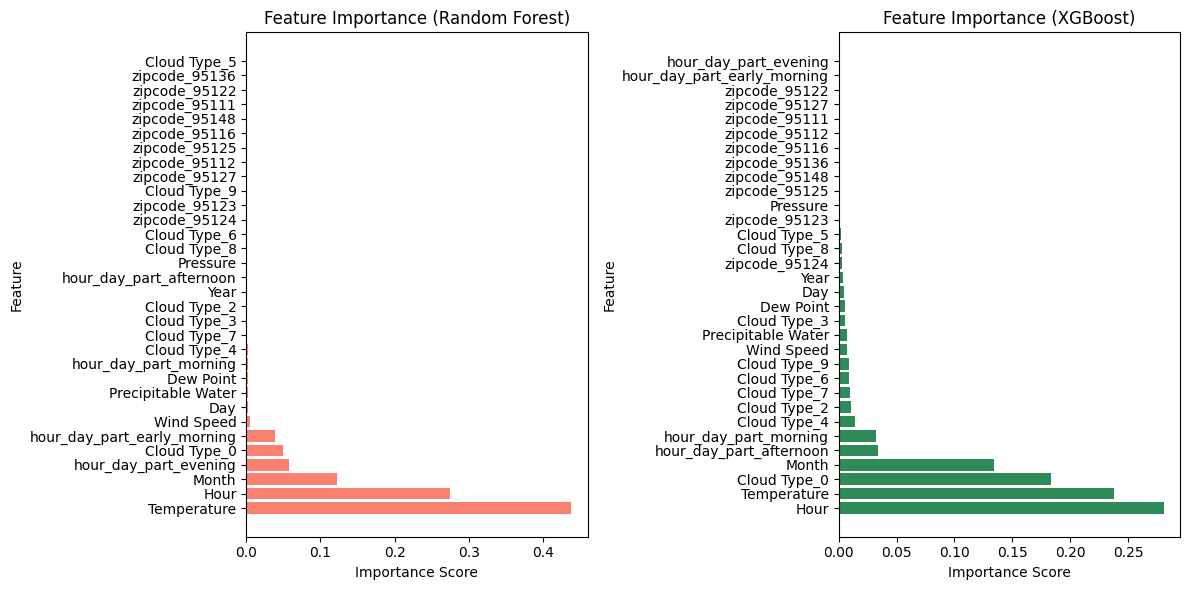

In [ ]:
# Setting the size for the plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# Plotting feature importance from Random Forest
axes[0].barh(y=rf_importance_df['Feature'], width=rf_importance_df['Importance from RF'], color='salmon')
axes[0].set_title('Feature Importance (Random Forest)')
axes[0].set_xlabel('Importance Score')
axes[0].set_ylabel('Feature')

# Plotting feature importance from Random Forest
axes[1].barh(y=xgb_importance_df['Feature'], width=xgb_importance_df['Importance from XGBoost'], color='seagreen')
axes[1].set_title('Feature Importance (XGBoost)')
axes[1].set_xlabel('Importance Score')
axes[1].set_ylabel('Feature')

# Adjusting layout
plt.tight_layout()

# Showing plot
plt.show()

Time of the day is the most important feature in predicting irradiance

## Irradiance to electricity calculation (WIP)

In [ ]:
# Simulation
# Defining constants
panel_area = 1.8  # m²
panel_efficiency = 0.20  # 20%
hours_of_sunlight = 5  # hours
irradiance = 1000  # W/m²

# Step 0: Getting predictions from any existing model (best performing one)
predicted_irradiance = y_pred #changed best_rf_y_pred to y_pred

# Step 1: Calculation of power generation per panel
power_generation_per_panel = predicted_irradiance * panel_area * panel_efficiency

# Step 2: Determination daily energy generation
daily_energy_generation_per_panel = power_generation_per_panel * hours_of_sunlight

# Step 3: Conversion to kilowatt-hours (kWh) - this is power generation in ideal conditions
daily_energy_generation_kwh_per_panel = daily_energy_generation_per_panel / 1000

# Step 4: Consideration of additional factors like system losses
system_losses = 0.1  # assuming 10%
daily_energy_generation_kwh_per_panel_after_losses = daily_energy_generation_kwh_per_panel * (1 - system_losses)

# Results
print("Daily energy generation per panel (kWh) before losses:", daily_energy_generation_kwh_per_panel)
print("Daily energy generation per panel (kWh) after losses:", daily_energy_generation_kwh_per_panel_after_losses)


In [ ]:
# Extrapolating this calculation to street lights use case

# Step 1: Determining the number of street lights
total_street_lights = 1000  # Example: Total number of street lights in the city

# Step 2: Estimating the wattage of street lights
average_wattage_per_light = 150  # Example: Average wattage of street lights in watts

# Step 3: Calculation of daily energy consumption per street light
hours_of_operation_per_day = 10  # Example: Operating hours per day
daily_energy_consumption_per_light = average_wattage_per_light * hours_of_operation_per_day

# Step 4: Calculation of total daily energy consumption
total_daily_energy_consumption = daily_energy_consumption_per_light * total_street_lights

# Step 5: Conversion to kilowatt-hours (kWh)
total_daily_energy_consumption_kwh = total_daily_energy_consumption / 1000

# Step 6: Considering efficiency and losses
efficiency_losses = 0.1  # assuming 10%
total_daily_energy_consumption_kwh_after_losses = total_daily_energy_consumption_kwh * (1 - efficiency_losses)

# Results
print("Total daily energy consumption for street lights (kWh) before losses:", total_daily_energy_consumption_kwh)
print("Total daily energy consumption for street lights (kWh) after losses:", total_daily_energy_consumption_kwh_after_losses)

In [ ]:
# Irradiance estimation for a particular timeframe

# Generating Date Range for the Rest of the Year
start_date = '2024-04-20'  # Start date
end_date = '2024-12-31'  # End date
date_range = pd.date_range(start=start_date, end=end_date)

# Listing relevant features for prediction
relevant_features = ['Temperature', 'Pressure', 'Precipitable Water', 'Wind Speed']  # Example relevant features

# Creating a date_column from day, month and year
solar_ir_df_nondark_encoded['date_column'] = pd.to_datetime(solar_ir_df_nondark_encoded[['year', 'month', 'day']])


# Filtering modeling data for the specified date range and extract relevant features
filtered_data = solar_ir_df_nondark_encoded[(solar_ir_df_nondark_encoded['date_column'] >= start_date)
                                            & (solar_ir_df_nondark_encoded['date_column'] <= end_date)]

X_rest_of_year = filtered_data[relevant_features].values

# Predictung Irradiance for Each Day
predicted_irradiance_rest_of_year = best_rf_model.predict(X_rest_of_year)

# Estimating Operation Hours for Streetlights
threshold_irradiance = 200  # Example: Threshold irradiance for street light operation
operation_hours_per_day = np.maximum(predicted_irradiance_rest_of_year - threshold_irradiance, 0)  # Calculate operation hours
operation_hours_per_day_scaled = operation_hours_per_day * 1000  # Scale operation hours for 1000 streetlights

# Visualizing the Results
plt.figure(figsize=(10, 6))
plt.plot(date_range, operation_hours_per_day_scaled, marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Operation Hours for 1000 Streetlights')
plt.title('Estimated Operation Hours for 1000 Streetlights per Day')
plt.grid(True)
plt.show()